In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import string

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'HCR Dotum'#'NanumGothic'


import json


In [ ]:
year=input('분석할 년도를 입력하세요 : ')

분석할 년도를 입력하세요 : 2018


In [ ]:
import os
path = "data/년월별/"

In [ ]:
month_ea=12
for i in range(1, month_ea+1):
    globals()['month_{}'.format(i)]=pd.read_csv(path+'{}_{}.csv'.format(year,i), encoding='cp949')

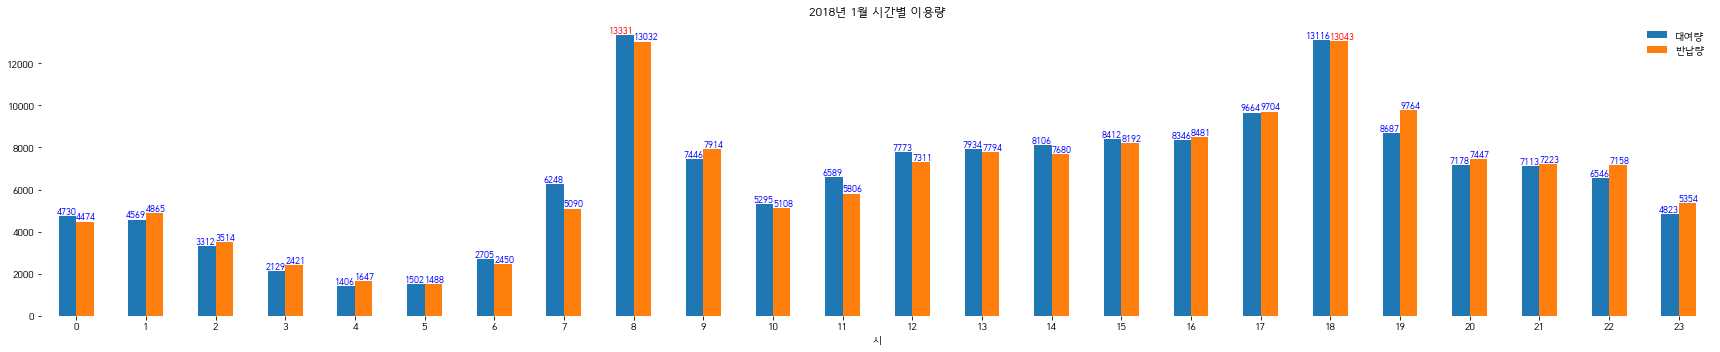

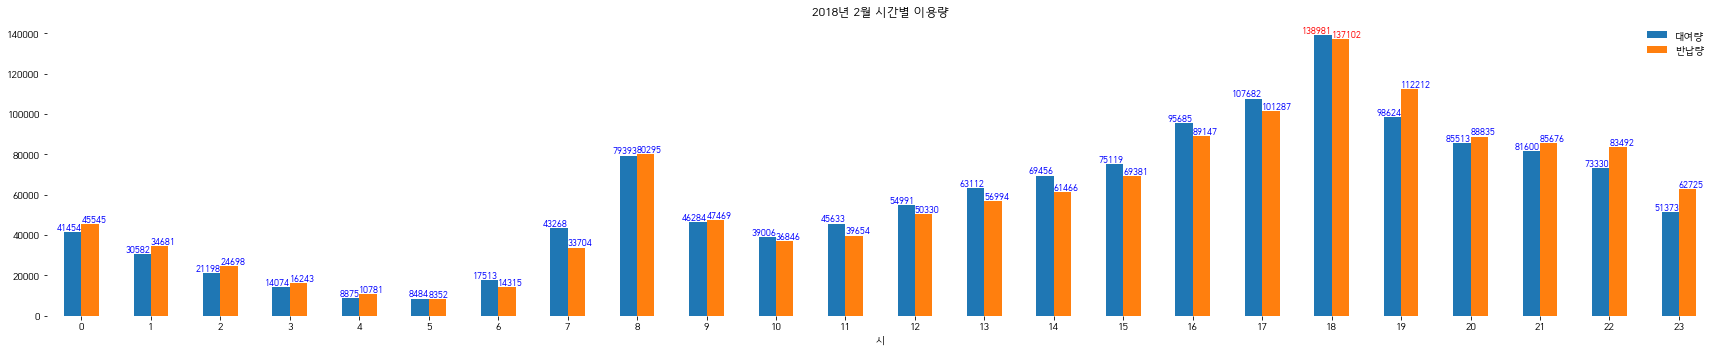

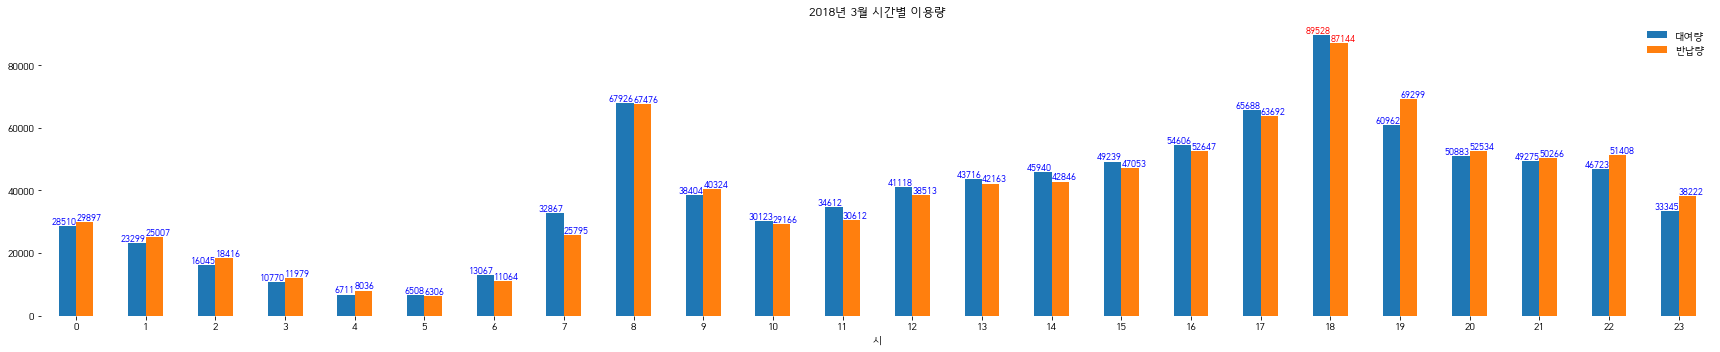

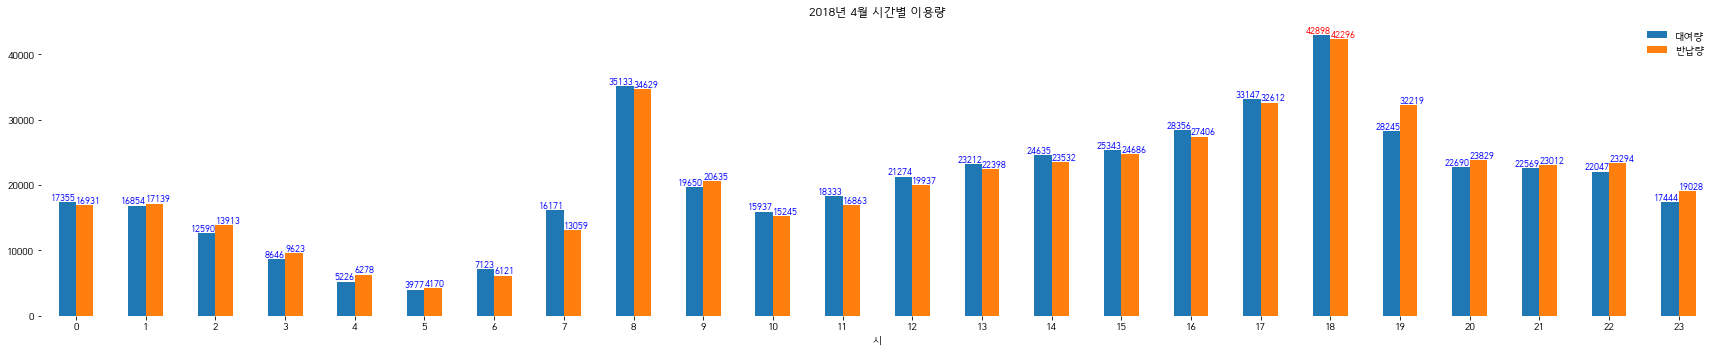

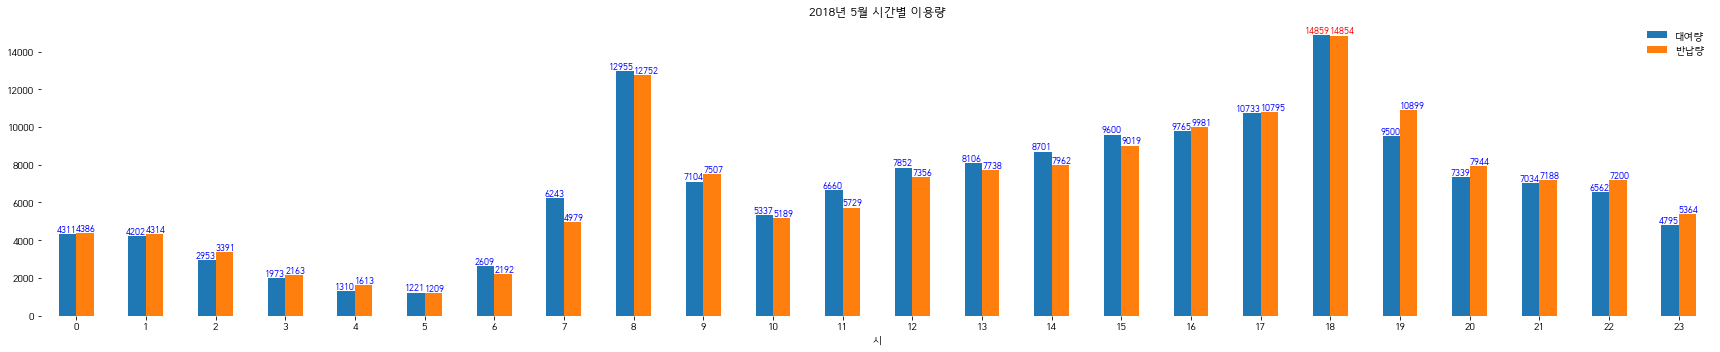

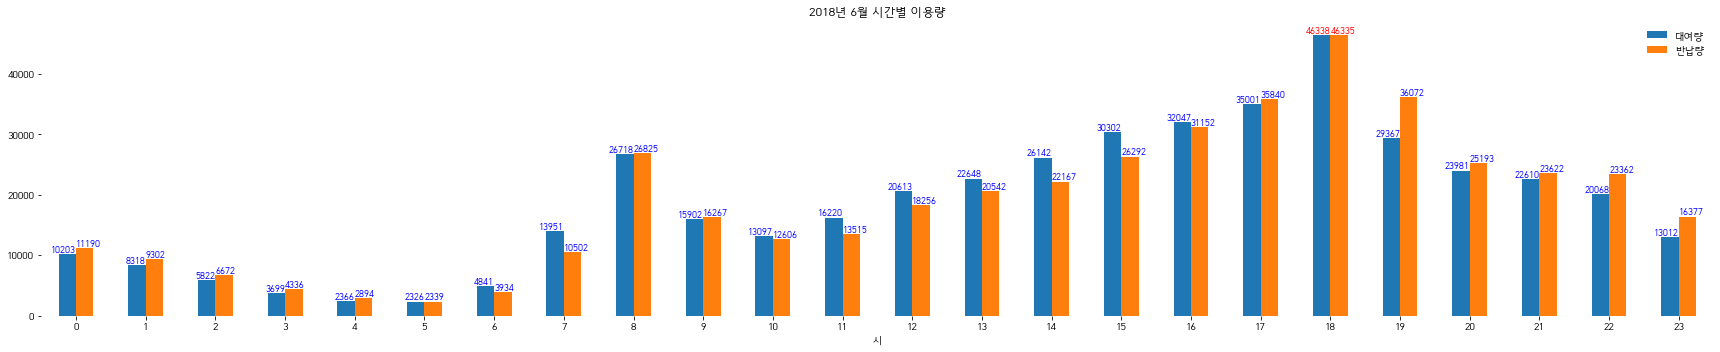

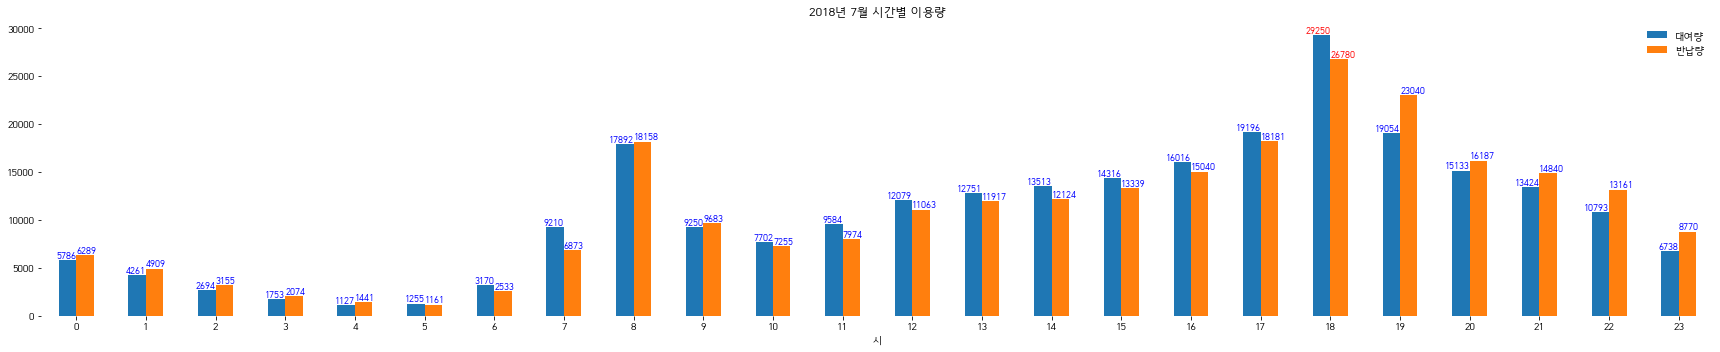

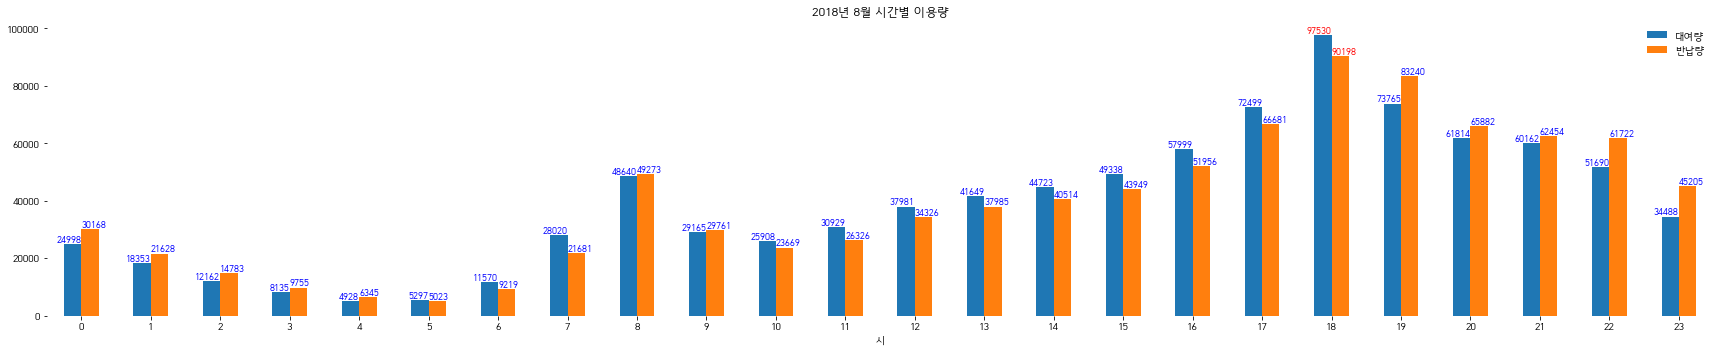

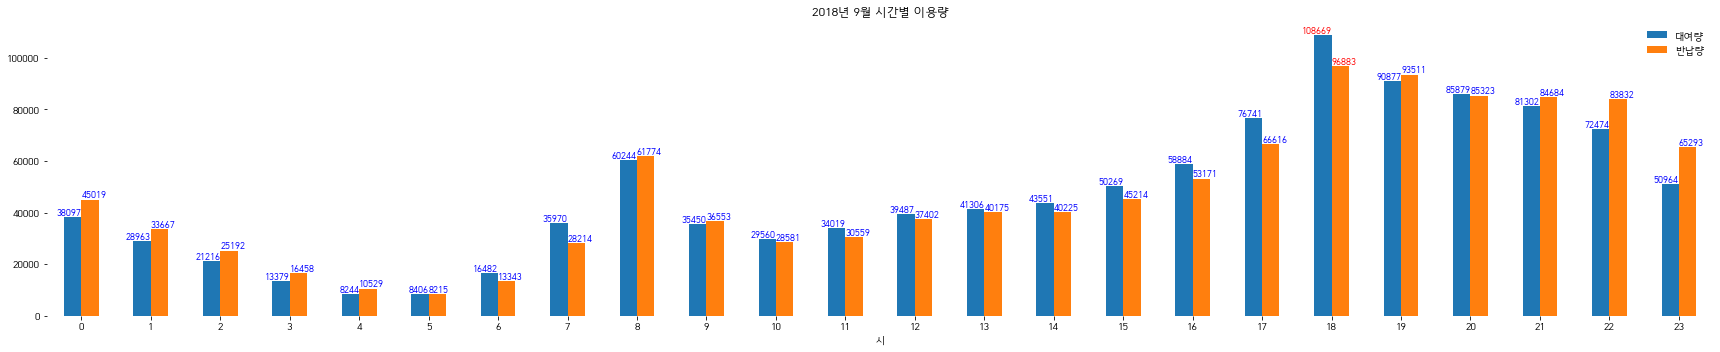

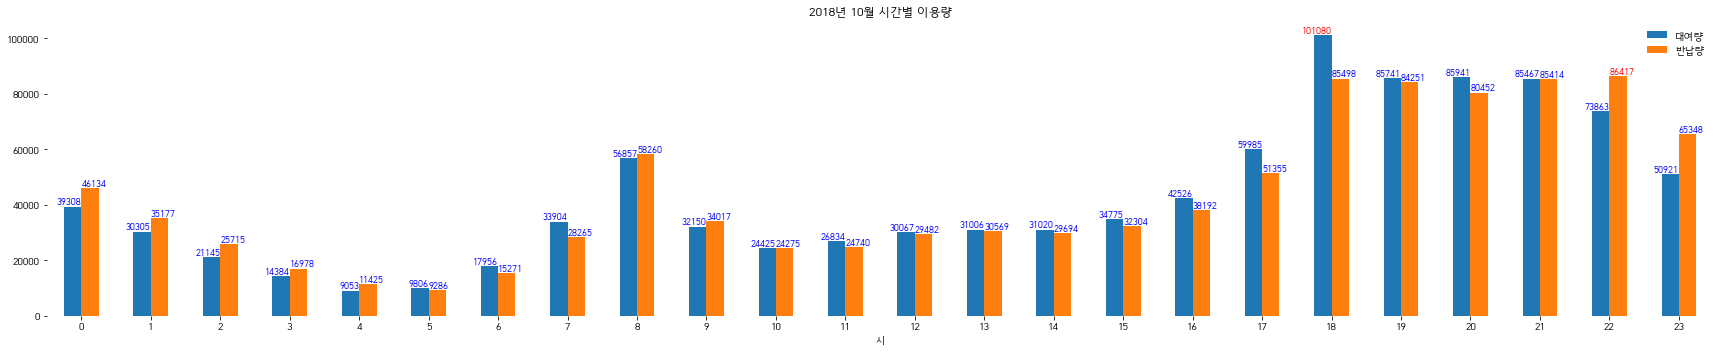

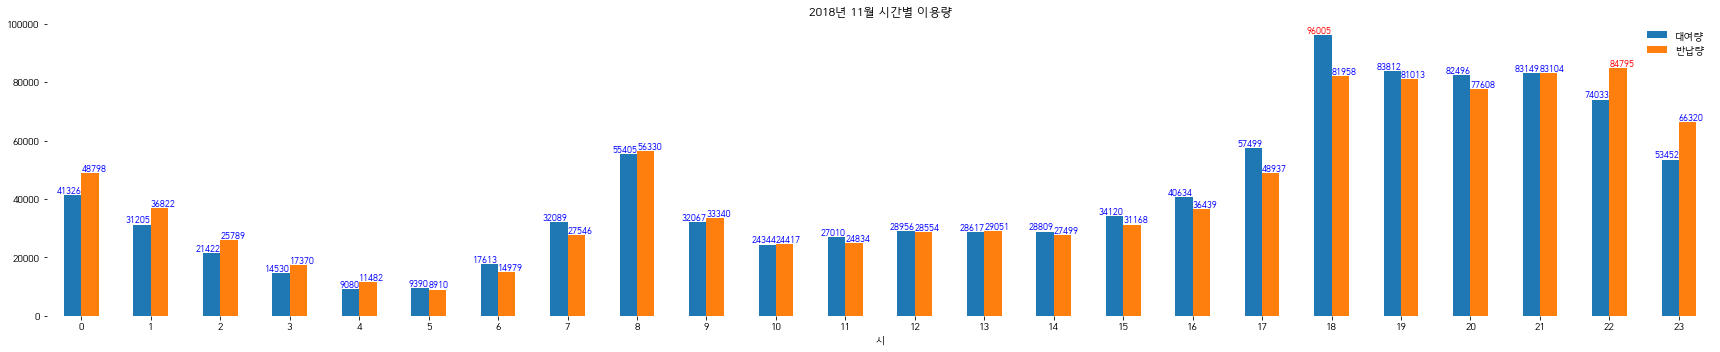

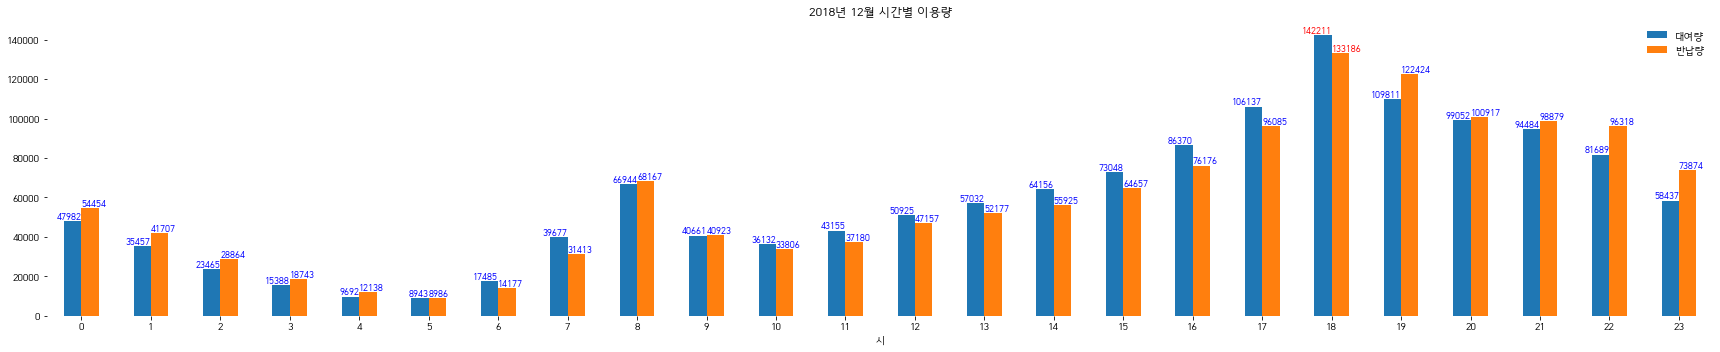

In [ ]:
for i in range(1, month_ea+1):
    globals()['month_{}_time'.format(i)]={
        "대여량": globals()['month_{}'.format(i)][globals()['month_{}'.format(i)]['대여요일'].isin(set(range(0, 7)))].groupby('대여시').size(),
        "반납량": globals()['month_{}'.format(i)][globals()['month_{}'.format(i)]['대여요일'].isin(set(range(0, 7)))].groupby('반납시').size(),
        }
    pd.DataFrame(globals()['month_{}_time'.format(i)]).plot(kind='bar', figsize=(24,5), rot=0, title="{}년 {}월 시간별 이용량".format(year,i))

    leng = len(globals()['month_{}'.format(i)]['대여시'].unique())
    
    for j in range(0, leng):
        if max(globals()['month_{}_time'.format(i)]["대여량"]) == globals()['month_{}_time'.format(i)]["대여량"][j]:
              COLOR='red'
        else :
              COLOR='blue'
            
        plt.text(j , globals()['month_{}_time'.format(i)]["대여량"][j],
                 globals()['month_{}_time'.format(i)]["대여량"][j],
                 fontsize = 9, color=COLOR,
                 horizontalalignment='right',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom
        
        if max(globals()['month_{}_time'.format(i)]["반납량"]) == globals()['month_{}_time'.format(i)]["반납량"][j]:
                COLOR='red'
        else :
                COLOR='blue'
            
        plt.text(j , globals()['month_{}_time'.format(i)]["반납량"][j],
                 globals()['month_{}_time'.format(i)]["반납량"][j],
                 fontsize = 9, color=COLOR,
                 horizontalalignment='left',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom    
    
 
    plt.xlabel("시")
    plt.box(False)
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.savefig("월별_분석/월별 시간대별 이용량/{}년도_{}월 시간대별 이용량.png".format(year,i),facecolor='w')
    plt.show()